In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook

In [58]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train_len = len(train)

In [59]:
y = train['income']

In [60]:
data_all = pd.concat([train.iloc[:, :-1], test])

## marital-status

In [61]:
data_all['marital-status'][data_all['marital-status']!=' Married-civ-spouse'] = 0
data_all['marital-status'][data_all['marital-status']==' Married-civ-spouse'] = 1
data_all['marital-status'] = data_all['marital-status'].astype('int64')

C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## relationship

In [62]:
data_all['relationship'][(data_all['relationship']!=' Husband') & (data_all['relationship']!=' Wife')] = 0
data_all['relationship'][(data_all['relationship']==' Husband') | (data_all['relationship']==' Wife')] = 1
data_all['relationship'] = data_all['relationship'].astype('int64')

C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bigBro\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
data_all.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,219199,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States
1,39,Private,52978,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States
2,35,Private,196899,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti
3,64,Private,135527,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States
4,24,Private,60783,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States


## drop un-important column

In [63]:
del data_all['education']
del data_all['native-country']
#del data_all['workclass']
del data_all['no']
del data_all['race']
del one_hot_encoding['fnlwgt']

## one-hot Encoding

In [64]:
one_hot_encoding = pd.get_dummies(data_all)
one_hot_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 19536
Data columns (total 34 columns):
age                              48842 non-null int64
fnlwgt                           48842 non-null int64
education-num                    48842 non-null int64
marital-status                   48842 non-null int64
relationship                     48842 non-null int64
capital-gain                     48842 non-null int64
capital-loss                     48842 non-null int64
hours-per-week                   48842 non-null int64
workclass_ ?                     48842 non-null uint8
workclass_ Federal-gov           48842 non-null uint8
workclass_ Local-gov             48842 non-null uint8
workclass_ Never-worked          48842 non-null uint8
workclass_ Private               48842 non-null uint8
workclass_ Self-emp-inc          48842 non-null uint8
workclass_ Self-emp-not-inc      48842 non-null uint8
workclass_ State-gov             48842 non-null uint8
workclass_ Without-pay     

In [65]:
one_hot_encoding.columns

Index(['age', 'fnlwgt', 'education-num', 'marital-status', 'relationship',
       'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'occupation_ ?',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'sex_ Female', 'sex_ Male'],
      dtype='object')

In [66]:
del one_hot_encoding['fnlwgt']
del one_hot_encoding['occupation_ ?']
del one_hot_encoding['occupation_ Adm-clerical']
del one_hot_encoding['occupation_ Armed-Forces']
del one_hot_encoding['occupation_ Craft-repair']
del one_hot_encoding['occupation_ Farming-fishing']
del one_hot_encoding['occupation_ Handlers-cleaners']
del one_hot_encoding['occupation_ Machine-op-inspct']
del one_hot_encoding['occupation_ Other-service']
del one_hot_encoding['occupation_ Priv-house-serv']
del one_hot_encoding['occupation_ Protective-serv']
del one_hot_encoding['occupation_ Sales']
del one_hot_encoding['occupation_ Tech-support']
del one_hot_encoding['occupation_ Transport-moving']

## Data preprocessing

In [67]:
X = one_hot_encoding[:train_len]
X_test = one_hot_encoding[train_len:]

In [68]:
sc = MinMaxScaler()
sc.fit(one_hot_encoding)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [69]:
X_tr = sc.transform(X)
X_te = sc.transform(X_test)

## Train Model

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, GridSearchCV
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [14]:
import keras

Using TensorFlow backend.


### SVC

In [115]:
from sklearn.svm import SVC

In [116]:
svc = SVC(C=10)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size = 0.2, random_state = 0)

In [119]:
hyperparam_list = []
C_list = [100000]
G_list = [0.1, 0.01]
for c in tqdm_notebook(C_list):
    for g in G_list:
        svc = SVC(C=c, gamma=g)
        svc.fit(X_train, y_train)
        score = cross_val_score(svc ,X_test, y_test).mean()
        hyperparam_list.append([c, g, score])

hp = pd.DataFrame(hyperparam_list)

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [118]:
svc.fit(X_train, y_train)

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: 

In [147]:
cross_val_score(svc ,X_test, y_test)

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0.84851586, 0.84544524, 0.84792627])

In [158]:
hp.sort_values(by=2, ascending=False)

,0,1,2
8,100000,0.10,0.847808
9,100000,0.01,0.847126
2,100,0.10,0.845419
6,10000,0.10,0.845078
4,1000,0.10,0.844737
7,10000,0.01,0.844396
5,1000,0.01,0.844225
3,100,0.01,0.836719
0,10,0.10,0.834842
1,10,0.01,0.828018


### RandomForest

In [17]:
rfc = RandomForestClassifier(random_state=42)
param_grid_rf = { 
    'n_estimators': [500,700,1100,1300,1500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [13,15,17,19,21],
    'criterion' :['gini', 'entropy']
}

In [18]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv= 5)
CV_rfc.fit(X_train, y)

KeyboardInterrupt: 

In [230]:
print(CV_rfc.best_params_)
model_rf = CV_rfc.best_estimator_

{'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto', 'n_estimators': 500}


In [73]:
model_rf = RandomForestClassifier(random_state=42, criterion='gini', max_depth=13, max_features='auto',n_estimators=500)
model_rf.fit(X_tr, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [74]:
cross_val_score(model_rf, X_tr, y)

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.84379159, 0.85810811, 0.85524161])

### XGBoost

In [175]:
xgbc = xgb.XGBClassifier(random_state=42)

In [176]:
param_grid={'booster' :['gbtree'],
                 'silent':[True],
                 'max_depth':[5,6,8],
                 'min_child_weight':[1,3,5],
                 'gamma':[0,1,2,3],
                 'nthread':[4],
                 'colsample_bytree':[0.5,0.8],
                 'colsample_bylevel':[0.9],
                 'n_estimators':[50, 100, 200, 300],
                 'objective':['binary:logistic'],
                 'random_state':[2]}
cv=KFold(n_splits=6, random_state=1)
gcv=GridSearchCV(xgbc, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

gcv.fit(X_train, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=10, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [80]:
#print(gcv.best_params_)
model_xgbc = XGBClassifier(booster='gbtree', colsample_bylevel=1, colsample_bytree=0.5, gamma=0, max_depth=5, min_child_weight=1, n_estimators=500, objective='binary:logistic',random_state=42, silent=True)

In [76]:
model_xgbc.fit(X_tr, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [77]:
cross_val_score(model_xgbc, X_tr, y).mean()

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7201584907849622

# AdaBoost

In [120]:
from sklearn.ensemble import AdaBoostClassifier

In [138]:
model_ada = AdaBoostClassifier(random_state=0)

In [139]:
param_grid={'n_estimators':[16, 32, 64]}
gcv_ada=GridSearchCV(model_ada, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

gcv_ada.fit(X_tr, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=0),
             iid='warn', n_jobs=-1, param_grid={'n_estimators': [16, 32, 64]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [140]:
model_ada = gcv_ada.best_estimator_

In [155]:
cross_val_score(model_ada, X_tr, y)

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.2404545 , 0.85677723, 0.85135135])

# LogisticRegression


In [156]:
from sklearn.linear_model import LogisticRegression

In [158]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_tr,y)

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [159]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.8493089916396519


## Deep Learning

In [24]:
from keras import models
from keras import layers
from keras import regularizers

In [25]:
X = one_hot_encoding[:train_len]
X_test = one_hot_encoding[train_len:]

In [26]:
sc = MinMaxScaler()
sc.fit(one_hot_encoding)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [27]:
X_train_D = sc.transform(X)
X_test_D = sc.transform(X_test)

In [28]:
X_td, X_val, y_td, y_val = train_test_split(X_train_D, y, test_size=0.3, random_state=1)

In [29]:
X_td.shape

(20513, 92)

In [47]:
model = models.Sequential()
model.add(layers.Dense(256, kernel_initializer='normal', activation='relu', input_shape=(92,)))
model.add(layers.Dense(64, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(32, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
model.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [52]:
hist = model.fit(X_td, y_td, batch_size=64, epochs=500, validation_data=(X_val, y_val))

Train on 20513 samples, validate on 8792 samples
Epoch 1/500
20513/20513 [==============================] - ETA: 5s - loss: 0.2577 - acc: 0.875 - ETA: 1s - loss: 0.2686 - acc: 0.875 - ETA: 0s - loss: 0.2744 - acc: 0.870 - ETA: 0s - loss: 0.2847 - acc: 0.861 - ETA: 0s - loss: 0.2779 - acc: 0.865 - ETA: 0s - loss: 0.2785 - acc: 0.866 - ETA: 0s - loss: 0.2765 - acc: 0.867 - ETA: 0s - loss: 0.2757 - acc: 0.868 - ETA: 0s - loss: 0.2758 - acc: 0.867 - ETA: 0s - loss: 0.2763 - acc: 0.868 - ETA: 0s - loss: 0.2771 - acc: 0.869 - ETA: 0s - loss: 0.2762 - acc: 0.870 - ETA: 0s - loss: 0.2767 - acc: 0.869 - ETA: 0s - loss: 0.2774 - acc: 0.869 - ETA: 0s - loss: 0.2783 - acc: 0.869 - ETA: 0s - loss: 0.2799 - acc: 0.867 - ETA: 0s - loss: 0.2793 - acc: 0.868 - ETA: 0s - loss: 0.2791 - acc: 0.869 - 1s 52us/step - loss: 0.2789 - acc: 0.8694 - val_loss: 0.4073 - val_acc: 0.8462
Epoch 2/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2869 - acc: 0.875 - ETA: 1s - loss: 0.2870 - acc: 0.

Epoch 11/500
20513/20513 [==============================] - ETA: 0s - loss: 0.3039 - acc: 0.906 - ETA: 0s - loss: 0.2741 - acc: 0.882 - ETA: 0s - loss: 0.2799 - acc: 0.871 - ETA: 0s - loss: 0.2784 - acc: 0.872 - ETA: 0s - loss: 0.2769 - acc: 0.873 - ETA: 0s - loss: 0.2820 - acc: 0.868 - ETA: 0s - loss: 0.2791 - acc: 0.870 - ETA: 0s - loss: 0.2813 - acc: 0.869 - ETA: 0s - loss: 0.2803 - acc: 0.871 - ETA: 0s - loss: 0.2802 - acc: 0.869 - ETA: 0s - loss: 0.2799 - acc: 0.869 - ETA: 0s - loss: 0.2768 - acc: 0.871 - ETA: 0s - loss: 0.2757 - acc: 0.872 - ETA: 0s - loss: 0.2754 - acc: 0.873 - ETA: 0s - loss: 0.2773 - acc: 0.872 - ETA: 0s - loss: 0.2763 - acc: 0.872 - ETA: 0s - loss: 0.2771 - acc: 0.872 - ETA: 0s - loss: 0.2775 - acc: 0.871 - 1s 50us/step - loss: 0.2769 - acc: 0.8715 - val_loss: 0.3754 - val_acc: 0.8446
Epoch 12/500
20513/20513 [==============================] - ETA: 0s - loss: 0.3906 - acc: 0.843 - ETA: 0s - loss: 0.2848 - acc: 0.877 - ETA: 0s - loss: 0.2862 - acc: 0.867 - ETA

Epoch 21/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1798 - acc: 0.906 - ETA: 0s - loss: 0.2569 - acc: 0.882 - ETA: 0s - loss: 0.2579 - acc: 0.877 - ETA: 0s - loss: 0.2640 - acc: 0.876 - ETA: 0s - loss: 0.2675 - acc: 0.875 - ETA: 0s - loss: 0.2707 - acc: 0.874 - ETA: 0s - loss: 0.2687 - acc: 0.875 - ETA: 0s - loss: 0.2717 - acc: 0.874 - ETA: 0s - loss: 0.2687 - acc: 0.876 - ETA: 0s - loss: 0.2691 - acc: 0.876 - ETA: 0s - loss: 0.2720 - acc: 0.876 - ETA: 0s - loss: 0.2717 - acc: 0.875 - ETA: 0s - loss: 0.2728 - acc: 0.875 - ETA: 0s - loss: 0.2708 - acc: 0.876 - ETA: 0s - loss: 0.2699 - acc: 0.877 - ETA: 0s - loss: 0.2708 - acc: 0.876 - ETA: 0s - loss: 0.2701 - acc: 0.876 - ETA: 0s - loss: 0.2706 - acc: 0.876 - 1s 49us/step - loss: 0.2710 - acc: 0.8769 - val_loss: 0.3780 - val_acc: 0.8371
Epoch 22/500
20513/20513 [==============================] - ETA: 1s - loss: 0.3667 - acc: 0.828 - ETA: 0s - loss: 0.2472 - acc: 0.891 - ETA: 0s - loss: 0.2584 - acc: 0.885 - ETA

Epoch 31/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1999 - acc: 0.890 - ETA: 0s - loss: 0.2529 - acc: 0.893 - ETA: 0s - loss: 0.2642 - acc: 0.879 - ETA: 0s - loss: 0.2603 - acc: 0.881 - ETA: 0s - loss: 0.2589 - acc: 0.883 - ETA: 0s - loss: 0.2601 - acc: 0.881 - ETA: 0s - loss: 0.2626 - acc: 0.880 - ETA: 0s - loss: 0.2621 - acc: 0.880 - ETA: 0s - loss: 0.2609 - acc: 0.881 - ETA: 0s - loss: 0.2618 - acc: 0.880 - ETA: 0s - loss: 0.2625 - acc: 0.880 - ETA: 0s - loss: 0.2583 - acc: 0.881 - ETA: 0s - loss: 0.2592 - acc: 0.881 - ETA: 0s - loss: 0.2596 - acc: 0.881 - ETA: 0s - loss: 0.2603 - acc: 0.881 - ETA: 0s - loss: 0.2612 - acc: 0.881 - ETA: 0s - loss: 0.2628 - acc: 0.880 - ETA: 0s - loss: 0.2624 - acc: 0.880 - 1s 50us/step - loss: 0.2615 - acc: 0.8816 - val_loss: 0.3939 - val_acc: 0.8479
Epoch 32/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1994 - acc: 0.906 - ETA: 0s - loss: 0.2541 - acc: 0.878 - ETA: 0s - loss: 0.2641 - acc: 0.874 - ETA

Epoch 41/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1199 - acc: 0.953 - ETA: 0s - loss: 0.2222 - acc: 0.901 - ETA: 0s - loss: 0.2530 - acc: 0.885 - ETA: 0s - loss: 0.2591 - acc: 0.880 - ETA: 0s - loss: 0.2491 - acc: 0.884 - ETA: 0s - loss: 0.2483 - acc: 0.884 - ETA: 0s - loss: 0.2524 - acc: 0.884 - ETA: 0s - loss: 0.2522 - acc: 0.884 - ETA: 0s - loss: 0.2528 - acc: 0.883 - ETA: 0s - loss: 0.2517 - acc: 0.883 - ETA: 0s - loss: 0.2525 - acc: 0.884 - ETA: 0s - loss: 0.2531 - acc: 0.883 - ETA: 0s - loss: 0.2522 - acc: 0.884 - ETA: 0s - loss: 0.2526 - acc: 0.883 - ETA: 0s - loss: 0.2532 - acc: 0.883 - ETA: 0s - loss: 0.2532 - acc: 0.883 - ETA: 0s - loss: 0.2531 - acc: 0.883 - ETA: 0s - loss: 0.2535 - acc: 0.884 - 1s 51us/step - loss: 0.2530 - acc: 0.8846 - val_loss: 0.4105 - val_acc: 0.8475
Epoch 42/500
20513/20513 [==============================] - ETA: 1s - loss: 0.3140 - acc: 0.875 - ETA: 0s - loss: 0.2299 - acc: 0.900 - ETA: 0s - loss: 0.2466 - acc: 0.891 - ETA

Epoch 60/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2599 - acc: 0.921 - ETA: 0s - loss: 0.2362 - acc: 0.896 - ETA: 0s - loss: 0.2465 - acc: 0.886 - ETA: 0s - loss: 0.2341 - acc: 0.893 - ETA: 0s - loss: 0.2419 - acc: 0.890 - ETA: 0s - loss: 0.2405 - acc: 0.889 - ETA: 0s - loss: 0.2369 - acc: 0.892 - ETA: 0s - loss: 0.2423 - acc: 0.889 - ETA: 0s - loss: 0.2404 - acc: 0.890 - ETA: 0s - loss: 0.2407 - acc: 0.889 - ETA: 0s - loss: 0.2435 - acc: 0.887 - ETA: 0s - loss: 0.2430 - acc: 0.888 - ETA: 0s - loss: 0.2425 - acc: 0.889 - ETA: 0s - loss: 0.2414 - acc: 0.889 - ETA: 0s - loss: 0.2410 - acc: 0.889 - ETA: 0s - loss: 0.2414 - acc: 0.889 - ETA: 0s - loss: 0.2413 - acc: 0.889 - ETA: 0s - loss: 0.2400 - acc: 0.890 - 1s 49us/step - loss: 0.2398 - acc: 0.8900 - val_loss: 0.4870 - val_acc: 0.8439
Epoch 61/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2337 - acc: 0.906 - ETA: 0s - loss: 0.2360 - acc: 0.892 - ETA: 0s - loss: 0.2351 - acc: 0.894 - ETA

Epoch 70/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2354 - acc: 0.875 - ETA: 0s - loss: 0.2428 - acc: 0.892 - ETA: 0s - loss: 0.2326 - acc: 0.897 - ETA: 0s - loss: 0.2346 - acc: 0.894 - ETA: 0s - loss: 0.2328 - acc: 0.891 - ETA: 0s - loss: 0.2295 - acc: 0.894 - ETA: 0s - loss: 0.2295 - acc: 0.895 - ETA: 0s - loss: 0.2331 - acc: 0.893 - ETA: 0s - loss: 0.2335 - acc: 0.894 - ETA: 0s - loss: 0.2311 - acc: 0.895 - ETA: 0s - loss: 0.2328 - acc: 0.893 - ETA: 0s - loss: 0.2345 - acc: 0.892 - ETA: 0s - loss: 0.2344 - acc: 0.892 - ETA: 0s - loss: 0.2346 - acc: 0.892 - ETA: 0s - loss: 0.2344 - acc: 0.892 - ETA: 0s - loss: 0.2341 - acc: 0.892 - ETA: 0s - loss: 0.2333 - acc: 0.893 - ETA: 0s - loss: 0.2343 - acc: 0.892 - 1s 49us/step - loss: 0.2350 - acc: 0.8920 - val_loss: 0.4751 - val_acc: 0.8427
Epoch 71/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2845 - acc: 0.890 - ETA: 0s - loss: 0.2116 - acc: 0.898 - ETA: 0s - loss: 0.2237 - acc: 0.892 - ETA

20513/20513 [==============================] - ETA: 1s - loss: 0.3160 - acc: 0.875 - ETA: 0s - loss: 0.2239 - acc: 0.894 - ETA: 0s - loss: 0.2341 - acc: 0.888 - ETA: 0s - loss: 0.2289 - acc: 0.891 - ETA: 0s - loss: 0.2245 - acc: 0.895 - ETA: 0s - loss: 0.2235 - acc: 0.895 - ETA: 0s - loss: 0.2257 - acc: 0.895 - ETA: 0s - loss: 0.2213 - acc: 0.897 - ETA: 0s - loss: 0.2209 - acc: 0.898 - ETA: 0s - loss: 0.2232 - acc: 0.897 - ETA: 0s - loss: 0.2263 - acc: 0.896 - ETA: 0s - loss: 0.2256 - acc: 0.897 - ETA: 0s - loss: 0.2268 - acc: 0.897 - ETA: 0s - loss: 0.2285 - acc: 0.897 - ETA: 0s - loss: 0.2292 - acc: 0.896 - ETA: 0s - loss: 0.2312 - acc: 0.895 - ETA: 0s - loss: 0.2311 - acc: 0.895 - ETA: 0s - loss: 0.2297 - acc: 0.895 - 1s 49us/step - loss: 0.2293 - acc: 0.8956 - val_loss: 0.5618 - val_acc: 0.8391
Epoch 89/500
20513/20513 [==============================] - ETA: 0s - loss: 0.2182 - acc: 0.921 - ETA: 0s - loss: 0.2307 - acc: 0.896 - ETA: 0s - loss: 0.2175 - acc: 0.908 - ETA: 0s - loss: 

20513/20513 [==============================] - ETA: 1s - loss: 0.2295 - acc: 0.890 - ETA: 0s - loss: 0.2105 - acc: 0.912 - ETA: 0s - loss: 0.2127 - acc: 0.904 - ETA: 0s - loss: 0.2186 - acc: 0.899 - ETA: 0s - loss: 0.2160 - acc: 0.900 - ETA: 0s - loss: 0.2179 - acc: 0.900 - ETA: 0s - loss: 0.2186 - acc: 0.901 - ETA: 0s - loss: 0.2230 - acc: 0.899 - ETA: 0s - loss: 0.2215 - acc: 0.900 - ETA: 0s - loss: 0.2193 - acc: 0.900 - ETA: 0s - loss: 0.2229 - acc: 0.898 - ETA: 0s - loss: 0.2218 - acc: 0.898 - ETA: 0s - loss: 0.2215 - acc: 0.898 - ETA: 0s - loss: 0.2211 - acc: 0.898 - ETA: 0s - loss: 0.2226 - acc: 0.897 - ETA: 0s - loss: 0.2244 - acc: 0.897 - ETA: 0s - loss: 0.2266 - acc: 0.896 - ETA: 0s - loss: 0.2242 - acc: 0.897 - 1s 50us/step - loss: 0.2237 - acc: 0.8985 - val_loss: 0.5826 - val_acc: 0.8422
Epoch 107/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2216 - acc: 0.921 - ETA: 0s - loss: 0.2189 - acc: 0.896 - ETA: 0s - loss: 0.2215 - acc: 0.895 - ETA: 0s - loss:

20513/20513 [==============================] - ETA: 1s - loss: 0.2577 - acc: 0.875 - ETA: 1s - loss: 0.1899 - acc: 0.915 - ETA: 0s - loss: 0.2011 - acc: 0.911 - ETA: 0s - loss: 0.2026 - acc: 0.910 - ETA: 0s - loss: 0.2142 - acc: 0.904 - ETA: 0s - loss: 0.2105 - acc: 0.904 - ETA: 0s - loss: 0.2132 - acc: 0.903 - ETA: 0s - loss: 0.2149 - acc: 0.904 - ETA: 0s - loss: 0.2166 - acc: 0.904 - ETA: 0s - loss: 0.2160 - acc: 0.902 - ETA: 0s - loss: 0.2149 - acc: 0.904 - ETA: 0s - loss: 0.2148 - acc: 0.903 - ETA: 0s - loss: 0.2164 - acc: 0.902 - ETA: 0s - loss: 0.2189 - acc: 0.900 - ETA: 0s - loss: 0.2198 - acc: 0.900 - ETA: 0s - loss: 0.2207 - acc: 0.899 - ETA: 0s - loss: 0.2212 - acc: 0.898 - ETA: 0s - loss: 0.2210 - acc: 0.898 - ETA: 0s - loss: 0.2203 - acc: 0.899 - 1s 51us/step - loss: 0.2210 - acc: 0.8987 - val_loss: 0.5904 - val_acc: 0.8359
Epoch 125/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1044 - acc: 0.984 - ETA: 0s - loss: 0.1767 - acc: 0.920 - ETA: 0s - loss:

20513/20513 [==============================] - ETA: 1s - loss: 0.1654 - acc: 0.921 - ETA: 0s - loss: 0.2045 - acc: 0.907 - ETA: 0s - loss: 0.1965 - acc: 0.910 - ETA: 0s - loss: 0.2069 - acc: 0.905 - ETA: 0s - loss: 0.2097 - acc: 0.903 - ETA: 0s - loss: 0.2139 - acc: 0.900 - ETA: 0s - loss: 0.2177 - acc: 0.898 - ETA: 0s - loss: 0.2184 - acc: 0.898 - ETA: 0s - loss: 0.2172 - acc: 0.900 - ETA: 0s - loss: 0.2163 - acc: 0.901 - ETA: 0s - loss: 0.2165 - acc: 0.901 - ETA: 0s - loss: 0.2153 - acc: 0.901 - ETA: 0s - loss: 0.2142 - acc: 0.902 - ETA: 0s - loss: 0.2168 - acc: 0.901 - ETA: 0s - loss: 0.2176 - acc: 0.901 - ETA: 0s - loss: 0.2183 - acc: 0.901 - ETA: 0s - loss: 0.2185 - acc: 0.901 - ETA: 0s - loss: 0.2177 - acc: 0.901 - ETA: 0s - loss: 0.2177 - acc: 0.901 - ETA: 0s - loss: 0.2185 - acc: 0.901 - 1s 56us/step - loss: 0.2188 - acc: 0.9002 - val_loss: 0.6152 - val_acc: 0.8372
Epoch 143/500
20513/20513 [==============================] - ETA: 0s - loss: 0.2654 - acc: 0.859 - ETA: 0s - loss:

20513/20513 [==============================] - ETA: 0s - loss: 0.1321 - acc: 0.937 - ETA: 0s - loss: 0.1693 - acc: 0.927 - ETA: 0s - loss: 0.1882 - acc: 0.914 - ETA: 0s - loss: 0.2000 - acc: 0.909 - ETA: 0s - loss: 0.2018 - acc: 0.908 - ETA: 0s - loss: 0.2075 - acc: 0.907 - ETA: 0s - loss: 0.2091 - acc: 0.906 - ETA: 0s - loss: 0.2103 - acc: 0.905 - ETA: 0s - loss: 0.2100 - acc: 0.906 - ETA: 0s - loss: 0.2105 - acc: 0.905 - ETA: 0s - loss: 0.2121 - acc: 0.905 - ETA: 0s - loss: 0.2127 - acc: 0.904 - ETA: 0s - loss: 0.2123 - acc: 0.904 - ETA: 0s - loss: 0.2132 - acc: 0.904 - ETA: 0s - loss: 0.2135 - acc: 0.904 - ETA: 0s - loss: 0.2125 - acc: 0.904 - ETA: 0s - loss: 0.2131 - acc: 0.904 - ETA: 0s - loss: 0.2130 - acc: 0.905 - 1s 50us/step - loss: 0.2128 - acc: 0.9047 - val_loss: 0.6146 - val_acc: 0.8345
Epoch 161/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2484 - acc: 0.859 - ETA: 0s - loss: 0.1962 - acc: 0.902 - ETA: 0s - loss: 0.2045 - acc: 0.905 - ETA: 0s - loss:

Epoch 170/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1467 - acc: 0.953 - ETA: 0s - loss: 0.2131 - acc: 0.902 - ETA: 0s - loss: 0.1953 - acc: 0.912 - ETA: 0s - loss: 0.1958 - acc: 0.911 - ETA: 0s - loss: 0.1960 - acc: 0.911 - ETA: 0s - loss: 0.2002 - acc: 0.909 - ETA: 0s - loss: 0.2042 - acc: 0.906 - ETA: 0s - loss: 0.2044 - acc: 0.904 - ETA: 0s - loss: 0.2033 - acc: 0.905 - ETA: 0s - loss: 0.2072 - acc: 0.903 - ETA: 0s - loss: 0.2073 - acc: 0.903 - ETA: 0s - loss: 0.2078 - acc: 0.903 - ETA: 0s - loss: 0.2067 - acc: 0.903 - ETA: 0s - loss: 0.2103 - acc: 0.902 - ETA: 0s - loss: 0.2085 - acc: 0.903 - ETA: 0s - loss: 0.2082 - acc: 0.904 - ETA: 0s - loss: 0.2087 - acc: 0.903 - ETA: 0s - loss: 0.2093 - acc: 0.903 - 1s 50us/step - loss: 0.2110 - acc: 0.9025 - val_loss: 0.6705 - val_acc: 0.8209
Epoch 171/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2371 - acc: 0.890 - ETA: 0s - loss: 0.1963 - acc: 0.911 - ETA: 0s - loss: 0.2008 - acc: 0.910 - E

20513/20513 [==============================] - ETA: 0s - loss: 0.0685 - acc: 0.984 - ETA: 0s - loss: 0.2030 - acc: 0.904 - ETA: 0s - loss: 0.1971 - acc: 0.905 - ETA: 0s - loss: 0.2034 - acc: 0.906 - ETA: 0s - loss: 0.2053 - acc: 0.902 - ETA: 0s - loss: 0.2091 - acc: 0.903 - ETA: 0s - loss: 0.2079 - acc: 0.904 - ETA: 0s - loss: 0.2078 - acc: 0.906 - ETA: 0s - loss: 0.2093 - acc: 0.904 - ETA: 0s - loss: 0.2100 - acc: 0.905 - ETA: 0s - loss: 0.2099 - acc: 0.904 - ETA: 0s - loss: 0.2081 - acc: 0.905 - ETA: 0s - loss: 0.2081 - acc: 0.905 - ETA: 0s - loss: 0.2090 - acc: 0.905 - ETA: 0s - loss: 0.2080 - acc: 0.905 - ETA: 0s - loss: 0.2073 - acc: 0.905 - ETA: 0s - loss: 0.2075 - acc: 0.904 - ETA: 0s - loss: 0.2089 - acc: 0.904 - ETA: 0s - loss: 0.2095 - acc: 0.903 - 1s 52us/step - loss: 0.2094 - acc: 0.9037 - val_loss: 0.7053 - val_acc: 0.8270
Epoch 189/500
20513/20513 [==============================] - ETA: 0s - loss: 0.2141 - acc: 0.875 - ETA: 0s - loss: 0.2013 - acc: 0.898 - ETA: 0s - loss:

Epoch 207/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1907 - acc: 0.921 - ETA: 0s - loss: 0.2212 - acc: 0.901 - ETA: 0s - loss: 0.2081 - acc: 0.904 - ETA: 0s - loss: 0.2064 - acc: 0.903 - ETA: 0s - loss: 0.2037 - acc: 0.907 - ETA: 0s - loss: 0.2028 - acc: 0.908 - ETA: 0s - loss: 0.2075 - acc: 0.907 - ETA: 0s - loss: 0.2082 - acc: 0.906 - ETA: 0s - loss: 0.2076 - acc: 0.906 - ETA: 0s - loss: 0.2099 - acc: 0.905 - ETA: 0s - loss: 0.2100 - acc: 0.905 - ETA: 0s - loss: 0.2115 - acc: 0.905 - ETA: 0s - loss: 0.2082 - acc: 0.906 - ETA: 0s - loss: 0.2082 - acc: 0.905 - ETA: 0s - loss: 0.2084 - acc: 0.904 - ETA: 0s - loss: 0.2069 - acc: 0.905 - ETA: 0s - loss: 0.2074 - acc: 0.905 - ETA: 0s - loss: 0.2067 - acc: 0.905 - 1s 51us/step - loss: 0.2073 - acc: 0.9051 - val_loss: 0.7292 - val_acc: 0.8238
Epoch 208/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1343 - acc: 0.953 - ETA: 0s - loss: 0.2070 - acc: 0.908 - ETA: 0s - loss: 0.2107 - acc: 0.907 - E

Epoch 226/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2376 - acc: 0.875 - ETA: 0s - loss: 0.1952 - acc: 0.909 - ETA: 0s - loss: 0.1902 - acc: 0.913 - ETA: 0s - loss: 0.1997 - acc: 0.906 - ETA: 0s - loss: 0.1976 - acc: 0.909 - ETA: 0s - loss: 0.1972 - acc: 0.908 - ETA: 0s - loss: 0.1983 - acc: 0.908 - ETA: 0s - loss: 0.2003 - acc: 0.906 - ETA: 0s - loss: 0.2010 - acc: 0.905 - ETA: 0s - loss: 0.2018 - acc: 0.905 - ETA: 0s - loss: 0.2017 - acc: 0.905 - ETA: 0s - loss: 0.2002 - acc: 0.906 - ETA: 0s - loss: 0.1994 - acc: 0.907 - ETA: 0s - loss: 0.2000 - acc: 0.906 - ETA: 0s - loss: 0.1999 - acc: 0.906 - ETA: 0s - loss: 0.2030 - acc: 0.905 - ETA: 0s - loss: 0.2027 - acc: 0.905 - ETA: 0s - loss: 0.2029 - acc: 0.905 - 1s 50us/step - loss: 0.2047 - acc: 0.9055 - val_loss: 0.7667 - val_acc: 0.8168
Epoch 227/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2040 - acc: 0.937 - ETA: 0s - loss: 0.1910 - acc: 0.917 - ETA: 0s - loss: 0.1947 - acc: 0.911 - E

Epoch 236/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1664 - acc: 0.953 - ETA: 0s - loss: 0.1978 - acc: 0.914 - ETA: 0s - loss: 0.1962 - acc: 0.912 - ETA: 0s - loss: 0.1926 - acc: 0.912 - ETA: 0s - loss: 0.1950 - acc: 0.911 - ETA: 0s - loss: 0.2005 - acc: 0.910 - ETA: 0s - loss: 0.2000 - acc: 0.909 - ETA: 0s - loss: 0.2028 - acc: 0.908 - ETA: 0s - loss: 0.2017 - acc: 0.908 - ETA: 0s - loss: 0.2051 - acc: 0.907 - ETA: 0s - loss: 0.2020 - acc: 0.909 - ETA: 0s - loss: 0.2016 - acc: 0.909 - ETA: 0s - loss: 0.2039 - acc: 0.909 - ETA: 0s - loss: 0.2045 - acc: 0.909 - ETA: 0s - loss: 0.2045 - acc: 0.908 - ETA: 0s - loss: 0.2049 - acc: 0.908 - ETA: 0s - loss: 0.2054 - acc: 0.907 - ETA: 0s - loss: 0.2063 - acc: 0.907 - 1s 49us/step - loss: 0.2063 - acc: 0.9081 - val_loss: 0.6914 - val_acc: 0.8322
Epoch 237/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1946 - acc: 0.859 - ETA: 0s - loss: 0.1824 - acc: 0.914 - ETA: 0s - loss: 0.1831 - acc: 0.916 - E

Epoch 246/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2194 - acc: 0.906 - ETA: 0s - loss: 0.1957 - acc: 0.910 - ETA: 0s - loss: 0.2007 - acc: 0.912 - ETA: 0s - loss: 0.1900 - acc: 0.911 - ETA: 0s - loss: 0.1872 - acc: 0.913 - ETA: 0s - loss: 0.1907 - acc: 0.910 - ETA: 0s - loss: 0.1919 - acc: 0.910 - ETA: 0s - loss: 0.1919 - acc: 0.911 - ETA: 0s - loss: 0.1929 - acc: 0.909 - ETA: 0s - loss: 0.1960 - acc: 0.909 - ETA: 0s - loss: 0.1971 - acc: 0.909 - ETA: 0s - loss: 0.1977 - acc: 0.908 - ETA: 0s - loss: 0.1987 - acc: 0.907 - ETA: 0s - loss: 0.1981 - acc: 0.907 - ETA: 0s - loss: 0.1991 - acc: 0.907 - ETA: 0s - loss: 0.1990 - acc: 0.907 - ETA: 0s - loss: 0.1999 - acc: 0.906 - ETA: 0s - loss: 0.2022 - acc: 0.906 - 1s 51us/step - loss: 0.2019 - acc: 0.9069 - val_loss: 0.7222 - val_acc: 0.8316
Epoch 247/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1752 - acc: 0.921 - ETA: 0s - loss: 0.2088 - acc: 0.908 - ETA: 0s - loss: 0.2087 - acc: 0.906 - E

20513/20513 [==============================] - ETA: 1s - loss: 0.2189 - acc: 0.906 - ETA: 0s - loss: 0.1789 - acc: 0.919 - ETA: 0s - loss: 0.1915 - acc: 0.912 - ETA: 0s - loss: 0.1957 - acc: 0.911 - ETA: 0s - loss: 0.2016 - acc: 0.910 - ETA: 0s - loss: 0.1964 - acc: 0.913 - ETA: 0s - loss: 0.1948 - acc: 0.913 - ETA: 0s - loss: 0.1943 - acc: 0.912 - ETA: 0s - loss: 0.1946 - acc: 0.911 - ETA: 0s - loss: 0.1977 - acc: 0.909 - ETA: 0s - loss: 0.1975 - acc: 0.910 - ETA: 0s - loss: 0.1983 - acc: 0.909 - ETA: 0s - loss: 0.1992 - acc: 0.908 - ETA: 0s - loss: 0.1978 - acc: 0.909 - ETA: 0s - loss: 0.1987 - acc: 0.909 - ETA: 0s - loss: 0.2006 - acc: 0.909 - ETA: 0s - loss: 0.2000 - acc: 0.909 - ETA: 0s - loss: 0.1998 - acc: 0.909 - 1s 49us/step - loss: 0.2002 - acc: 0.9091 - val_loss: 0.8916 - val_acc: 0.8165
Epoch 265/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2171 - acc: 0.890 - ETA: 0s - loss: 0.2174 - acc: 0.892 - ETA: 0s - loss: 0.2107 - acc: 0.905 - ETA: 0s - loss:

Epoch 283/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2325 - acc: 0.875 - ETA: 0s - loss: 0.1972 - acc: 0.915 - ETA: 0s - loss: 0.1952 - acc: 0.917 - ETA: 0s - loss: 0.1884 - acc: 0.918 - ETA: 0s - loss: 0.1873 - acc: 0.917 - ETA: 0s - loss: 0.1959 - acc: 0.914 - ETA: 0s - loss: 0.1941 - acc: 0.915 - ETA: 0s - loss: 0.1945 - acc: 0.914 - ETA: 0s - loss: 0.1951 - acc: 0.914 - ETA: 0s - loss: 0.1957 - acc: 0.913 - ETA: 0s - loss: 0.1930 - acc: 0.914 - ETA: 0s - loss: 0.1953 - acc: 0.913 - ETA: 0s - loss: 0.1958 - acc: 0.913 - ETA: 0s - loss: 0.1946 - acc: 0.913 - ETA: 0s - loss: 0.1983 - acc: 0.912 - ETA: 0s - loss: 0.1998 - acc: 0.911 - ETA: 0s - loss: 0.2014 - acc: 0.910 - ETA: 0s - loss: 0.2016 - acc: 0.910 - 1s 49us/step - loss: 0.2013 - acc: 0.9103 - val_loss: 0.7882 - val_acc: 0.8226
Epoch 284/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1560 - acc: 0.921 - ETA: 0s - loss: 0.1688 - acc: 0.922 - ETA: 0s - loss: 0.1743 - acc: 0.918 - E

20513/20513 [==============================] - ETA: 1s - loss: 0.1949 - acc: 0.890 - ETA: 0s - loss: 0.1992 - acc: 0.903 - ETA: 0s - loss: 0.1937 - acc: 0.908 - ETA: 0s - loss: 0.1975 - acc: 0.909 - ETA: 0s - loss: 0.2014 - acc: 0.908 - ETA: 0s - loss: 0.1989 - acc: 0.909 - ETA: 0s - loss: 0.1943 - acc: 0.910 - ETA: 0s - loss: 0.1933 - acc: 0.911 - ETA: 0s - loss: 0.1922 - acc: 0.912 - ETA: 0s - loss: 0.1931 - acc: 0.912 - ETA: 0s - loss: 0.1948 - acc: 0.911 - ETA: 0s - loss: 0.1951 - acc: 0.911 - ETA: 0s - loss: 0.1961 - acc: 0.911 - ETA: 0s - loss: 0.1972 - acc: 0.911 - ETA: 0s - loss: 0.1964 - acc: 0.912 - ETA: 0s - loss: 0.1967 - acc: 0.912 - ETA: 0s - loss: 0.1978 - acc: 0.911 - ETA: 0s - loss: 0.1976 - acc: 0.911 - 1s 50us/step - loss: 0.1971 - acc: 0.9122 - val_loss: 0.8228 - val_acc: 0.8293
Epoch 303/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1089 - acc: 0.968 - ETA: 0s - loss: 0.1753 - acc: 0.916 - ETA: 0s - loss: 0.1880 - acc: 0.914 - ETA: 0s - loss:

Epoch 312/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1047 - acc: 0.984 - ETA: 0s - loss: 0.1697 - acc: 0.921 - ETA: 0s - loss: 0.1706 - acc: 0.923 - ETA: 0s - loss: 0.1773 - acc: 0.918 - ETA: 0s - loss: 0.1833 - acc: 0.917 - ETA: 0s - loss: 0.1858 - acc: 0.918 - ETA: 0s - loss: 0.1876 - acc: 0.916 - ETA: 0s - loss: 0.1894 - acc: 0.914 - ETA: 0s - loss: 0.1914 - acc: 0.916 - ETA: 0s - loss: 0.1915 - acc: 0.913 - ETA: 0s - loss: 0.1909 - acc: 0.913 - ETA: 0s - loss: 0.1904 - acc: 0.914 - ETA: 0s - loss: 0.1901 - acc: 0.914 - ETA: 0s - loss: 0.1897 - acc: 0.914 - ETA: 0s - loss: 0.1924 - acc: 0.913 - ETA: 0s - loss: 0.1950 - acc: 0.912 - ETA: 0s - loss: 0.1939 - acc: 0.913 - ETA: 0s - loss: 0.1961 - acc: 0.912 - 1s 50us/step - loss: 0.1973 - acc: 0.9123 - val_loss: 0.9600 - val_acc: 0.8049
Epoch 313/500
20513/20513 [==============================] - ETA: 1s - loss: 0.5567 - acc: 0.812 - ETA: 0s - loss: 0.2231 - acc: 0.907 - ETA: 0s - loss: 0.2086 - acc: 0.911 - E

Epoch 332/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1455 - acc: 0.968 - ETA: 0s - loss: 0.1810 - acc: 0.927 - ETA: 0s - loss: 0.1848 - acc: 0.919 - ETA: 0s - loss: 0.1856 - acc: 0.918 - ETA: 0s - loss: 0.1874 - acc: 0.915 - ETA: 0s - loss: 0.1812 - acc: 0.918 - ETA: 0s - loss: 0.1834 - acc: 0.918 - ETA: 0s - loss: 0.1877 - acc: 0.916 - ETA: 0s - loss: 0.1911 - acc: 0.913 - ETA: 0s - loss: 0.1961 - acc: 0.912 - ETA: 0s - loss: 0.1976 - acc: 0.912 - ETA: 0s - loss: 0.1978 - acc: 0.912 - ETA: 0s - loss: 0.1994 - acc: 0.911 - ETA: 0s - loss: 0.1988 - acc: 0.911 - ETA: 0s - loss: 0.1968 - acc: 0.913 - ETA: 0s - loss: 0.1970 - acc: 0.912 - ETA: 0s - loss: 0.1971 - acc: 0.912 - ETA: 0s - loss: 0.1970 - acc: 0.912 - 1s 49us/step - loss: 0.1975 - acc: 0.9129 - val_loss: 0.8566 - val_acc: 0.8245
Epoch 333/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2765 - acc: 0.890 - ETA: 0s - loss: 0.1719 - acc: 0.925 - ETA: 0s - loss: 0.1966 - acc: 0.907 - E

Epoch 342/500
20513/20513 [==============================] - ETA: 0s - loss: 0.2216 - acc: 0.859 - ETA: 0s - loss: 0.1718 - acc: 0.920 - ETA: 0s - loss: 0.1879 - acc: 0.916 - ETA: 0s - loss: 0.1804 - acc: 0.915 - ETA: 0s - loss: 0.1798 - acc: 0.915 - ETA: 0s - loss: 0.1851 - acc: 0.913 - ETA: 0s - loss: 0.1847 - acc: 0.914 - ETA: 0s - loss: 0.1847 - acc: 0.915 - ETA: 0s - loss: 0.1871 - acc: 0.914 - ETA: 0s - loss: 0.1877 - acc: 0.914 - ETA: 0s - loss: 0.1865 - acc: 0.915 - ETA: 0s - loss: 0.1905 - acc: 0.913 - ETA: 0s - loss: 0.1948 - acc: 0.912 - ETA: 0s - loss: 0.1953 - acc: 0.912 - ETA: 0s - loss: 0.1938 - acc: 0.912 - ETA: 0s - loss: 0.1965 - acc: 0.912 - ETA: 0s - loss: 0.1963 - acc: 0.911 - ETA: 0s - loss: 0.1970 - acc: 0.911 - 1s 49us/step - loss: 0.1970 - acc: 0.9117 - val_loss: 0.8512 - val_acc: 0.8277
Epoch 343/500
20513/20513 [==============================] - ETA: 0s - loss: 0.2466 - acc: 0.875 - ETA: 0s - loss: 0.1904 - acc: 0.917 - ETA: 0s - loss: 0.1779 - acc: 0.923 - E

Epoch 352/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1729 - acc: 0.906 - ETA: 0s - loss: 0.2070 - acc: 0.913 - ETA: 0s - loss: 0.2122 - acc: 0.915 - ETA: 0s - loss: 0.1984 - acc: 0.920 - ETA: 0s - loss: 0.1926 - acc: 0.918 - ETA: 0s - loss: 0.1900 - acc: 0.918 - ETA: 0s - loss: 0.1969 - acc: 0.914 - ETA: 0s - loss: 0.1950 - acc: 0.915 - ETA: 0s - loss: 0.1938 - acc: 0.914 - ETA: 0s - loss: 0.1919 - acc: 0.915 - ETA: 0s - loss: 0.1950 - acc: 0.914 - ETA: 0s - loss: 0.1929 - acc: 0.916 - ETA: 0s - loss: 0.1929 - acc: 0.915 - ETA: 0s - loss: 0.1940 - acc: 0.915 - ETA: 0s - loss: 0.1938 - acc: 0.914 - ETA: 0s - loss: 0.1940 - acc: 0.914 - ETA: 0s - loss: 0.1956 - acc: 0.913 - ETA: 0s - loss: 0.1949 - acc: 0.913 - 1s 49us/step - loss: 0.1950 - acc: 0.9138 - val_loss: 0.8769 - val_acc: 0.8196
Epoch 353/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1203 - acc: 0.937 - ETA: 0s - loss: 0.1902 - acc: 0.903 - ETA: 0s - loss: 0.1976 - acc: 0.900 - E

Epoch 362/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1061 - acc: 0.968 - ETA: 0s - loss: 0.2084 - acc: 0.919 - ETA: 0s - loss: 0.1931 - acc: 0.923 - ETA: 0s - loss: 0.1981 - acc: 0.918 - ETA: 0s - loss: 0.1943 - acc: 0.918 - ETA: 0s - loss: 0.1977 - acc: 0.918 - ETA: 0s - loss: 0.1959 - acc: 0.915 - ETA: 0s - loss: 0.1936 - acc: 0.916 - ETA: 0s - loss: 0.1927 - acc: 0.915 - ETA: 0s - loss: 0.1948 - acc: 0.915 - ETA: 0s - loss: 0.1913 - acc: 0.916 - ETA: 0s - loss: 0.1922 - acc: 0.915 - ETA: 0s - loss: 0.1928 - acc: 0.914 - ETA: 0s - loss: 0.1925 - acc: 0.914 - ETA: 0s - loss: 0.1931 - acc: 0.914 - ETA: 0s - loss: 0.1925 - acc: 0.914 - ETA: 0s - loss: 0.1952 - acc: 0.913 - ETA: 0s - loss: 0.1964 - acc: 0.913 - 1s 50us/step - loss: 0.1969 - acc: 0.9135 - val_loss: 0.8600 - val_acc: 0.8252
Epoch 363/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1181 - acc: 0.937 - ETA: 0s - loss: 0.1569 - acc: 0.926 - ETA: 0s - loss: 0.1660 - acc: 0.924 - E

Epoch 381/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1613 - acc: 0.890 - ETA: 0s - loss: 0.1706 - acc: 0.911 - ETA: 0s - loss: 0.1712 - acc: 0.909 - ETA: 0s - loss: 0.1772 - acc: 0.909 - ETA: 0s - loss: 0.1779 - acc: 0.913 - ETA: 0s - loss: 0.1828 - acc: 0.910 - ETA: 0s - loss: 0.1909 - acc: 0.908 - ETA: 0s - loss: 0.1903 - acc: 0.909 - ETA: 0s - loss: 0.1910 - acc: 0.910 - ETA: 0s - loss: 0.1900 - acc: 0.910 - ETA: 0s - loss: 0.1876 - acc: 0.911 - ETA: 0s - loss: 0.1872 - acc: 0.912 - ETA: 0s - loss: 0.1871 - acc: 0.912 - ETA: 0s - loss: 0.1887 - acc: 0.912 - ETA: 0s - loss: 0.1873 - acc: 0.913 - ETA: 0s - loss: 0.1907 - acc: 0.912 - ETA: 0s - loss: 0.1903 - acc: 0.913 - ETA: 0s - loss: 0.1906 - acc: 0.913 - ETA: 0s - loss: 0.1898 - acc: 0.914 - 1s 51us/step - loss: 0.1895 - acc: 0.9145 - val_loss: 0.8835 - val_acc: 0.8285
Epoch 382/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1390 - acc: 0.921 - ETA: 0s - loss: 0.2009 - acc: 0.919 - E

Epoch 400/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1645 - acc: 0.921 - ETA: 0s - loss: 0.1759 - acc: 0.918 - ETA: 0s - loss: 0.1677 - acc: 0.918 - ETA: 0s - loss: 0.1715 - acc: 0.920 - ETA: 0s - loss: 0.1815 - acc: 0.918 - ETA: 0s - loss: 0.1858 - acc: 0.920 - ETA: 0s - loss: 0.1872 - acc: 0.919 - ETA: 0s - loss: 0.1930 - acc: 0.916 - ETA: 0s - loss: 0.1900 - acc: 0.917 - ETA: 0s - loss: 0.1895 - acc: 0.918 - ETA: 0s - loss: 0.1937 - acc: 0.915 - ETA: 0s - loss: 0.1944 - acc: 0.914 - ETA: 0s - loss: 0.1944 - acc: 0.915 - ETA: 0s - loss: 0.1969 - acc: 0.914 - ETA: 0s - loss: 0.1962 - acc: 0.914 - ETA: 0s - loss: 0.1976 - acc: 0.914 - ETA: 0s - loss: 0.1955 - acc: 0.914 - ETA: 0s - loss: 0.1951 - acc: 0.915 - 1s 50us/step - loss: 0.1943 - acc: 0.9155 - val_loss: 0.9060 - val_acc: 0.8279
Epoch 401/500
20513/20513 [==============================] - ETA: 0s - loss: 0.3440 - acc: 0.968 - ETA: 0s - loss: 0.1974 - acc: 0.916 - ETA: 0s - loss: 0.1913 - acc: 0.912 - E

Epoch 410/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1646 - acc: 0.953 - ETA: 0s - loss: 0.2128 - acc: 0.917 - ETA: 0s - loss: 0.1985 - acc: 0.916 - ETA: 0s - loss: 0.1926 - acc: 0.917 - ETA: 0s - loss: 0.1980 - acc: 0.914 - ETA: 0s - loss: 0.1944 - acc: 0.915 - ETA: 0s - loss: 0.1919 - acc: 0.917 - ETA: 0s - loss: 0.1886 - acc: 0.918 - ETA: 0s - loss: 0.1901 - acc: 0.917 - ETA: 0s - loss: 0.1888 - acc: 0.918 - ETA: 0s - loss: 0.1879 - acc: 0.919 - ETA: 0s - loss: 0.1900 - acc: 0.918 - ETA: 0s - loss: 0.1899 - acc: 0.919 - ETA: 0s - loss: 0.1887 - acc: 0.919 - ETA: 0s - loss: 0.1907 - acc: 0.918 - ETA: 0s - loss: 0.1924 - acc: 0.918 - ETA: 0s - loss: 0.1926 - acc: 0.917 - ETA: 0s - loss: 0.1944 - acc: 0.916 - 1s 49us/step - loss: 0.1946 - acc: 0.9162 - val_loss: 0.9049 - val_acc: 0.8210
Epoch 411/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1572 - acc: 0.937 - ETA: 0s - loss: 0.1784 - acc: 0.922 - ETA: 0s - loss: 0.1771 - acc: 0.923 - E

Epoch 420/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1858 - acc: 0.906 - ETA: 0s - loss: 0.1619 - acc: 0.926 - ETA: 0s - loss: 0.1652 - acc: 0.923 - ETA: 0s - loss: 0.1761 - acc: 0.917 - ETA: 0s - loss: 0.1751 - acc: 0.919 - ETA: 0s - loss: 0.1834 - acc: 0.917 - ETA: 0s - loss: 0.1861 - acc: 0.916 - ETA: 0s - loss: 0.1920 - acc: 0.915 - ETA: 0s - loss: 0.1929 - acc: 0.915 - ETA: 0s - loss: 0.1900 - acc: 0.915 - ETA: 0s - loss: 0.1894 - acc: 0.916 - ETA: 0s - loss: 0.1873 - acc: 0.916 - ETA: 0s - loss: 0.1889 - acc: 0.916 - ETA: 0s - loss: 0.1898 - acc: 0.916 - ETA: 0s - loss: 0.1903 - acc: 0.916 - ETA: 0s - loss: 0.1911 - acc: 0.915 - ETA: 0s - loss: 0.1908 - acc: 0.915 - ETA: 0s - loss: 0.1901 - acc: 0.915 - 1s 49us/step - loss: 0.1910 - acc: 0.9155 - val_loss: 0.9380 - val_acc: 0.8161
Epoch 421/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1315 - acc: 0.921 - ETA: 0s - loss: 0.1711 - acc: 0.925 - ETA: 0s - loss: 0.1808 - acc: 0.921 - E

Epoch 439/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1161 - acc: 0.921 - ETA: 0s - loss: 0.1905 - acc: 0.920 - ETA: 0s - loss: 0.1892 - acc: 0.918 - ETA: 0s - loss: 0.1858 - acc: 0.918 - ETA: 0s - loss: 0.1843 - acc: 0.919 - ETA: 0s - loss: 0.1814 - acc: 0.919 - ETA: 0s - loss: 0.1788 - acc: 0.919 - ETA: 0s - loss: 0.1804 - acc: 0.919 - ETA: 0s - loss: 0.1838 - acc: 0.918 - ETA: 0s - loss: 0.1826 - acc: 0.918 - ETA: 0s - loss: 0.1862 - acc: 0.917 - ETA: 0s - loss: 0.1918 - acc: 0.916 - ETA: 0s - loss: 0.1919 - acc: 0.916 - ETA: 0s - loss: 0.1911 - acc: 0.916 - ETA: 0s - loss: 0.1907 - acc: 0.916 - ETA: 0s - loss: 0.1902 - acc: 0.916 - ETA: 0s - loss: 0.1931 - acc: 0.916 - ETA: 0s - loss: 0.1917 - acc: 0.916 - ETA: 0s - loss: 0.1917 - acc: 0.917 - 1s 51us/step - loss: 0.1915 - acc: 0.9175 - val_loss: 0.9216 - val_acc: 0.8248
Epoch 440/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2770 - acc: 0.875 - ETA: 0s - loss: 0.1784 - acc: 0.916 - E

Epoch 458/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1690 - acc: 0.890 - ETA: 0s - loss: 0.1483 - acc: 0.918 - ETA: 0s - loss: 0.1726 - acc: 0.919 - ETA: 0s - loss: 0.1715 - acc: 0.919 - ETA: 0s - loss: 0.1757 - acc: 0.919 - ETA: 0s - loss: 0.1799 - acc: 0.920 - ETA: 0s - loss: 0.1791 - acc: 0.918 - ETA: 0s - loss: 0.1824 - acc: 0.916 - ETA: 0s - loss: 0.1825 - acc: 0.916 - ETA: 0s - loss: 0.1816 - acc: 0.916 - ETA: 0s - loss: 0.1852 - acc: 0.916 - ETA: 0s - loss: 0.1875 - acc: 0.915 - ETA: 0s - loss: 0.1881 - acc: 0.914 - ETA: 0s - loss: 0.1885 - acc: 0.914 - ETA: 0s - loss: 0.1894 - acc: 0.915 - ETA: 0s - loss: 0.1920 - acc: 0.915 - ETA: 0s - loss: 0.1911 - acc: 0.916 - ETA: 0s - loss: 0.1924 - acc: 0.916 - 1s 49us/step - loss: 0.1921 - acc: 0.9162 - val_loss: 0.9023 - val_acc: 0.8221
Epoch 459/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1641 - acc: 0.921 - ETA: 0s - loss: 0.1704 - acc: 0.938 - ETA: 0s - loss: 0.1744 - acc: 0.931 - E

Epoch 477/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1773 - acc: 0.890 - ETA: 0s - loss: 0.1659 - acc: 0.913 - ETA: 0s - loss: 0.1706 - acc: 0.912 - ETA: 0s - loss: 0.1681 - acc: 0.919 - ETA: 0s - loss: 0.1696 - acc: 0.919 - ETA: 0s - loss: 0.1745 - acc: 0.918 - ETA: 0s - loss: 0.1723 - acc: 0.920 - ETA: 0s - loss: 0.1726 - acc: 0.921 - ETA: 0s - loss: 0.1751 - acc: 0.921 - ETA: 0s - loss: 0.1759 - acc: 0.920 - ETA: 0s - loss: 0.1807 - acc: 0.919 - ETA: 0s - loss: 0.1811 - acc: 0.919 - ETA: 0s - loss: 0.1808 - acc: 0.919 - ETA: 0s - loss: 0.1862 - acc: 0.918 - ETA: 0s - loss: 0.1862 - acc: 0.918 - ETA: 0s - loss: 0.1875 - acc: 0.918 - ETA: 0s - loss: 0.1899 - acc: 0.917 - ETA: 0s - loss: 0.1903 - acc: 0.917 - 1s 50us/step - loss: 0.1891 - acc: 0.9178 - val_loss: 0.9205 - val_acc: 0.8270
Epoch 478/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1522 - acc: 0.875 - ETA: 0s - loss: 0.1933 - acc: 0.921 - ETA: 0s - loss: 0.1935 - acc: 0.920 - E

Epoch 487/500
20513/20513 [==============================] - ETA: 0s - loss: 0.4061 - acc: 0.937 - ETA: 0s - loss: 0.1942 - acc: 0.918 - ETA: 0s - loss: 0.1794 - acc: 0.927 - ETA: 0s - loss: 0.1847 - acc: 0.924 - ETA: 0s - loss: 0.1835 - acc: 0.922 - ETA: 0s - loss: 0.1868 - acc: 0.920 - ETA: 0s - loss: 0.1903 - acc: 0.917 - ETA: 0s - loss: 0.1863 - acc: 0.918 - ETA: 0s - loss: 0.1863 - acc: 0.920 - ETA: 0s - loss: 0.1841 - acc: 0.919 - ETA: 0s - loss: 0.1863 - acc: 0.918 - ETA: 0s - loss: 0.1859 - acc: 0.918 - ETA: 0s - loss: 0.1834 - acc: 0.919 - ETA: 0s - loss: 0.1840 - acc: 0.919 - ETA: 0s - loss: 0.1872 - acc: 0.917 - ETA: 0s - loss: 0.1870 - acc: 0.917 - ETA: 0s - loss: 0.1884 - acc: 0.916 - ETA: 0s - loss: 0.1890 - acc: 0.917 - 1s 50us/step - loss: 0.1885 - acc: 0.9174 - val_loss: 0.9510 - val_acc: 0.8190
Epoch 488/500
20513/20513 [==============================] - ETA: 0s - loss: 0.1541 - acc: 0.921 - ETA: 0s - loss: 0.1786 - acc: 0.924 - ETA: 0s - loss: 0.1674 - acc: 0.927 - E

Epoch 497/500
20513/20513 [==============================] - ETA: 1s - loss: 0.1680 - acc: 0.906 - ETA: 0s - loss: 0.1666 - acc: 0.922 - ETA: 0s - loss: 0.1812 - acc: 0.918 - ETA: 0s - loss: 0.1880 - acc: 0.919 - ETA: 0s - loss: 0.1930 - acc: 0.918 - ETA: 0s - loss: 0.1930 - acc: 0.918 - ETA: 0s - loss: 0.1907 - acc: 0.920 - ETA: 0s - loss: 0.1892 - acc: 0.919 - ETA: 0s - loss: 0.1903 - acc: 0.919 - ETA: 0s - loss: 0.1892 - acc: 0.919 - ETA: 0s - loss: 0.1900 - acc: 0.918 - ETA: 0s - loss: 0.1918 - acc: 0.916 - ETA: 0s - loss: 0.1945 - acc: 0.916 - ETA: 0s - loss: 0.1938 - acc: 0.916 - ETA: 0s - loss: 0.1930 - acc: 0.916 - ETA: 0s - loss: 0.1919 - acc: 0.916 - ETA: 0s - loss: 0.1917 - acc: 0.916 - ETA: 0s - loss: 0.1922 - acc: 0.916 - 1s 50us/step - loss: 0.1928 - acc: 0.9160 - val_loss: 0.9605 - val_acc: 0.8219
Epoch 498/500
20513/20513 [==============================] - ETA: 1s - loss: 0.2155 - acc: 0.906 - ETA: 0s - loss: 0.2086 - acc: 0.912 - ETA: 0s - loss: 0.2051 - acc: 0.917 - E

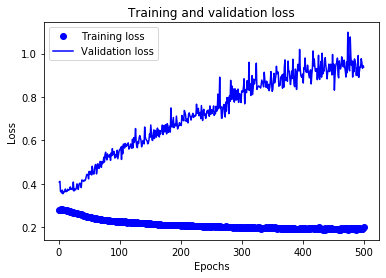

In [55]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

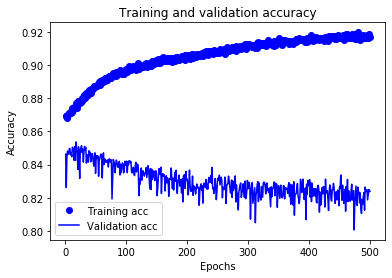

In [56]:
plt.clf()   # 그래프를 초기화합니다
acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [158]:
model = models.Sequential()
model.add(layers.Dense(64, kernel_initializer='normal', activation='relu', input_shape=(11,)))
model.add(layers.Dense(32, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])
model.fit(X_td, y_td, batch_size=512, epochs=4, validation_data=(X_val, y_val))

Train on 23444 samples, validate on 5861 samples
Epoch 1/4
23444/23444 [==============================] - 1s 36us/step - loss: 0.4846 - acc: 0.8058 - val_loss: 0.3553 - val_acc: 0.8377
Epoch 2/4
23444/23444 [==============================] - 0s 6us/step - loss: 0.3401 - acc: 0.8393 - val_loss: 0.3318 - val_acc: 0.8435
Epoch 3/4
23444/23444 [==============================] - 0s 6us/step - loss: 0.3283 - acc: 0.8447 - val_loss: 0.3252 - val_acc: 0.8470
Epoch 4/4
23444/23444 [==============================] - 0s 6us/step - loss: 0.3238 - acc: 0.8477 - val_loss: 0.3221 - val_acc: 0.8495


## LightGBM

In [148]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 0 to 29304
Data columns (total 20 columns):
age                            29305 non-null int64
education-num                  29305 non-null int64
marital-status                 29305 non-null int64
relationship                   29305 non-null int64
capital-gain                   29305 non-null int64
capital-loss                   29305 non-null int64
hours-per-week                 29305 non-null int64
workclass_ ?                   29305 non-null uint8
workclass_ Federal-gov         29305 non-null uint8
workclass_ Local-gov           29305 non-null uint8
workclass_ Never-worked        29305 non-null uint8
workclass_ Private             29305 non-null uint8
workclass_ Self-emp-inc        29305 non-null uint8
workclass_ Self-emp-not-inc    29305 non-null uint8
workclass_ State-gov           29305 non-null uint8
workclass_ Without-pay         29305 non-null uint8
occupation_ Exec-managerial    29305 non-null uint8
occupat

In [77]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [139]:
model_lgbm = LGBMClassifier()
param_grid = {
    'learning_rate': [0.1],
    'num_leaves': [63],
    'max_depth': [6],
    'reg_alpha': [0.05],
    'min_child_samples': [0],
    'min_data_in_leaf': [40],
    'n_estimators':[200]
    }
cv=KFold(n_splits=6, random_state=1)
gcv=GridSearchCV(model_lgbm, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)

gcv.fit(X_tr, y)

GridSearchCV(cv=KFold(n_splits=6, random_state=1, shuffle=False),
             error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=N...
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'l

In [140]:
gcv.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=0, min_child_weight=0.001, min_data_in_leaf=40,
               min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=63,
               objective=None, random_state=None, reg_alpha=0.05,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [141]:
model_lgbm = gcv.best_estimator_

In [142]:
cross_val_score(model_lgbm, X_tr, y).mean()

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8672922659768806

In [97]:
params = {
    "max_bin": 512,
    "learning_rate": 0.1,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 2,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model_ind = lgb.train(params, d_train, 20000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds.
[1000]	valid_0's binary_logloss: 0.300157
[2000]	valid_0's binary_logloss: 0.295805
[3000]	valid_0's binary_logloss: 0.29371
[4000]	valid_0's binary_logloss: 0.292434
[5000]	valid_0's binary_logloss: 0.291526
[6000]	valid_0's binary_logloss: 0.290836
[7000]	valid_0's binary_logloss: 0.290254
Early stopping, best iteration is:
[7112]	valid_0's binary_logloss: 0.290189


## Stacking

In [90]:
from vecstack import stacking
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
from tqdm import tqdm_notebook

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size = 0.2, random_state = 0)

In [181]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23444, 98)
(5861, 98)
(23444,)
(5861,)


In [182]:
models = [ ExtraTreesClassifier(random_state = 0, n_jobs = -1, n_estimators = 300, max_depth = 17), 
          RandomForestClassifier(criterion='gini', max_depth=13, max_features='auto', n_estimators=500), 
          XGBClassifier(booster='gbtree', colsample_bylevel=1, colsample_bytree=0.5, gamma=0, max_depth=5, min_child_weight=1, n_estimators=500, objective='binary:logistic',random_state=42, silent=True),
          LogisticRegression(random_state=0, C=100.0, penalty='l2'),
          AdaBoostClassifier(random_state=0, n_estimators=32),
         ]


In [194]:
S_train, S_test = stacking(models, X_train, y_train, X_test,
                           regression = False, metric = accuracy_score, n_folds = 4,
                           stratified = True, shuffle = True, random_state = 0, verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [ExtraTreesClassifier]
    fold  0:  [0.83589219]
    fold  1:  [0.84473639]
    fold  2:  [0.84064153]
    fold  3:  [0.83907850]
    ----
    MEAN:     [0.84008715] + [0.00318347]
    FULL:     [0.84008702]

model  1:     [RandomForestClassifier]
    fold  0:  [0.85039236]
    fold  1:  [0.85719161]
    fold  2:  [0.86213957]
    fold  3:  [0.85836177]
    ----
    MEAN:     [0.85702133] + [0.00424162]
    FULL:     [0.85702099]

model  2:     [XGBClassifier]
    fold  0:  [0.86438076]
    fold  1:  [0.86759939]
    fold  2:  [0.87032930]
    fold  3:  [0.86945392]
    ----
    MEAN:     [0.86794084] + [0.00227952]
    FULL:     [0.86794062]

model  3:     [LogisticRegression]


C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  0:  [0.84425111]


C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  1:  [0.84814878]


C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  2:  [0.84763692]


C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  3:  [0.84641638]
    ----
    MEAN:     [0.84661330] + [0.00150202]
    FULL:     [0.84661321]

model  4:     [AdaBoostClassifier]
    fold  0:  [0.84749232]
    fold  1:  [0.84866064]
    fold  2:  [0.85753284]
    fold  3:  [0.85597270]
    ----
    MEAN:     [0.85241463] + [0.00439254]
    FULL:     [0.85241426]



In [207]:
score_list = []
lr_list = [0.6]
est_list = [20]
metric_list = ['l1', 'l2']
for lr in tqdm_notebook(lr_list):
    for est in est_list:
        for mt in metric_list:
            model = LGBMClassifier(seed = 0, metric=mt, learning_rate=lr, n_estimators=est, num_leaves = 38)
            model = model.fit(S_train, y_train)
            score = cross_val_score(model, S_test, y_test, cv=5).mean()
            score_list.append([lr, est, mt, score])

In [208]:
pd.DataFrame(score_list).sort_values(by=3, ascending=False)

,0,1,2,3
2,0.6,20,l1,0.868280
3,0.6,20,l2,0.868280
4,0.6,30,l1,0.868109
5,0.6,30,l2,0.868109
0,0.6,10,l1,0.867086
1,0.6,10,l2,0.867086


In [209]:
S_train, S_test = stacking(models, X_train, y_train, X_te,
                           regression = False, metric = accuracy_score, n_folds = 4,
                           stratified = True, shuffle = True, random_state = 0, verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [ExtraTreesClassifier]
    fold  0:  [0.83589219]
    fold  1:  [0.84473639]
    fold  2:  [0.84064153]
    fold  3:  [0.83907850]
    ----
    MEAN:     [0.84008715] + [0.00318347]
    FULL:     [0.84008702]

model  1:     [RandomForestClassifier]
    fold  0:  [0.85022177]
    fold  1:  [0.85975090]
    fold  2:  [0.86265142]
    fold  3:  [0.85819113]
    ----
    MEAN:     [0.85770380] + [0.00460673]
    FULL:     [0.85770346]

model  2:     [XGBClassifier]
    fold  0:  [0.86438076]
    fold  1:  [0.86759939]
    fold  2:  [0.87032930]
    fold  3:  [0.86945392]
    ----
    MEAN:     [0.86794084] + [0.00227952]
    FULL:     [0.86794062]

model  3:     [LogisticRegression]


C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  0:  [0.84425111]


C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  1:  [0.84814878]


C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  2:  [0.84763692]


C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  3:  [0.84641638]
    ----
    MEAN:     [0.84661330] + [0.00150202]
    FULL:     [0.84661321]

model  4:     [AdaBoostClassifier]
    fold  0:  [0.84749232]
    fold  1:  [0.84866064]
    fold  2:  [0.85753284]
    fold  3:  [0.85597270]
    ----
    MEAN:     [0.85241463] + [0.00439254]
    FULL:     [0.85241426]



In [187]:
model = XGBClassifier(seed = 0, n_jobs = -1, learning_rate = 0.01, n_estimators = 400, max_depth = 2)
model = model.fit(S_train, y_train)

In [211]:
model = LGBMClassifier(learning_rate = 0.6,metric = 'l1', n_estimators = 20, num_leaves = 38)
model = model.fit(S_train, y_train)

In [212]:
y_pred = model.predict(S_test)

In [213]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## save submission

In [143]:
y_pred = model_lgbm.predict(X_te)
y_pred = (y_pred > 0.5)
y_pred = pd.DataFrame(y_pred, columns=['income'])
y_pred.iloc[:, 0].value_counts()

False    15725
True      3812
Name: income, dtype: int64

In [144]:
y_pred = pd.DataFrame(y_pred, columns=['income'])
y_pred.iloc[:, 0].value_counts()

False    15725
True      3812
Name: income, dtype: int64

In [145]:
# if nessesary
#y_pred = pd.DataFrame(y_pred.iloc[:,0], columns=['income'])
y_pred['income'].replace(True, 1, inplace=True)
y_pred['income'].replace(False, 0, inplace=True)
y_pred = y_pred.astype('int64')

In [146]:
result = pd.concat([pd.DataFrame(list(range(29306, 48843)), columns=['no']), y_pred], axis=1)
result.to_csv('./submission.csv', index=False)